Tugas Modul 5

Tera Makna Pratiwi (24060122140102)
Lab C1

**Soal 1**

Lakukan agglomerative clustering untuk dataset random yang tersedia di atas dengan single linkage dan average linkage! Jelaskan perbedaannya!

Jawab: Single Linkage cenderung menghasilkan cluster yang lebih panjang atau memanjang karena penggabungan cluster dilakukan berdasarkan jarak terdekat antar data point. Ini dapat menyebabkan "chaining" di mana dua cluster dengan beberapa titik jauh tapi terhubung akan digabungkan.
Average Linkage menghasilkan cluster yang lebih kompak dan kurang terpengaruh oleh titik data yang terpisah jauh, karena penggabungannya didasarkan pada rata-rata jarak antar data dalam cluster.

Library yang digunakan dalam clustering

In [153]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

Melakukan generate random data

In [154]:
x1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

Plotting random data

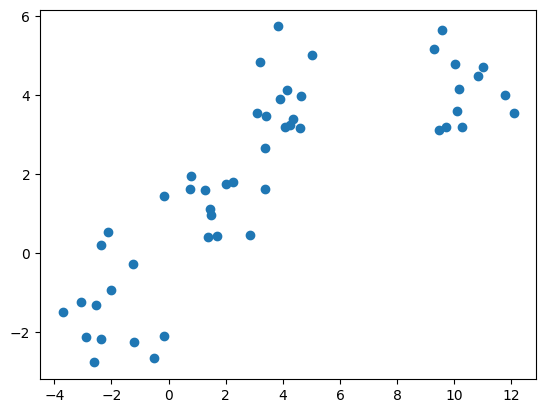

In [155]:
plt.scatter(x1[:, 0], x1[:, 1], marker='o')

Agglomerative Clustering

In [156]:
# single linkage
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'single')

In [157]:
agglom.fit(x1,y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

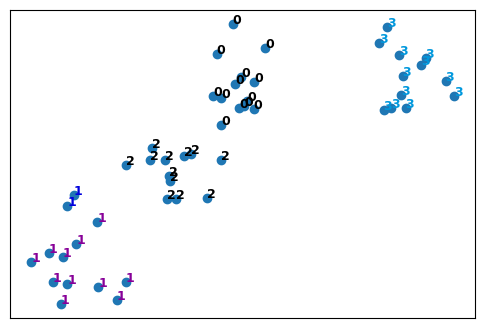

In [158]:
# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scatterd very far appart.

# Create a minimum and maximum range of x1
x_min, x_max = np.min(x1, axis=0), np.max(x1, axis =0)

# Get the averagedistance fo x1
x1 = (x1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints,
for i in range(x1.shape[0]):
# Replace the data points with their respective cluster value
# (ex. 0) and is color coded with a colormap (plt.cm.spectral)
  plt.text(x1[i, 0], x1[i, 1], str(y1[i]),
  color=plt.cm.nipy_spectral(agglom.labels_ [i] / 10.),
  fontdict = {'weight': 'bold', 'size' : 9})
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#pLlt.axis(‘off')
# Display the plot of the original data before clustering
plt.scatter(x1[:, 0], x1[:, 1], marker='o')
# Display the plot
plt.show()

In [159]:
# average linkage
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [160]:
agglom.fit(x1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

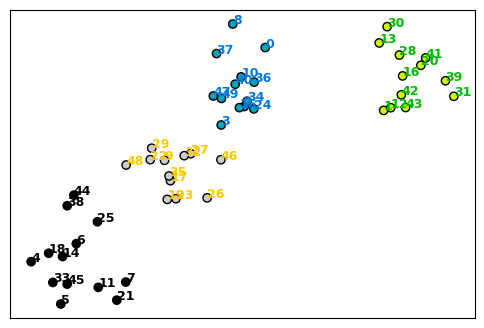

In [161]:
# Visualisasi
plt.figure(figsize=(6, 4))

# Normalisasi data ke rentang [0, 1]
x_min, x_max = np.min(x1, axis=0), np.max(x1, axis=0)
x1_normalized = (x1 - x_min) / (x_max - x_min)

# Menambahkan label dan warna berdasarkan hasil clustering
for i in range(x1.shape[0]):
    plt.text(
        x1_normalized[i, 0],
        x1_normalized[i, 1],
        str(i),  # Label data sebagai indeks
        color=plt.cm.nipy_spectral(agglom.labels_[i] / 4.0),  # Warna berdasarkan cluster
        fontdict={'weight': 'bold', 'size': 9}
    )

# Menghapus ticks pada sumbu x dan y
plt.xticks([])
plt.yticks([])

# Menampilkan scatter plot data asli
plt.scatter(x1_normalized[:, 0], x1_normalized[:, 1], marker='o', c=agglom.labels_, cmap='nipy_spectral', edgecolor='k')

# Menampilkan hasil visualisasi
plt.show()

Plotting dendogram

In [162]:
dist_matrix = distance_matrix(x1, x1)
print(dist_matrix)

[[0.         0.35896314 0.21622473 ... 0.21213676 0.53317235 0.20905535]
 [0.35896314 0.         0.32999343 ... 0.40615895 0.63960804 0.3859498 ]
 [0.21622473 0.32999343 0.         ... 0.08221825 0.34900146 0.06108707]
 ...
 [0.21213676 0.40615895 0.08221825 ... 0.         0.32143925 0.02116907]
 [0.53317235 0.63960804 0.34900146 ... 0.32143925 0.         0.32782402]
 [0.20905535 0.3859498  0.06108707 ... 0.02116907 0.32782402 0.        ]]


In [163]:
z = hierarchy.linkage(dist_matrix, 'complete')
x = hierarchy.linkage(dist_matrix, 'single')
y = hierarchy.linkage(dist_matrix, 'average')

<ipython-input-163-16cfcde9060f>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(dist_matrix, 'complete')
<ipython-input-163-16cfcde9060f>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  x = hierarchy.linkage(dist_matrix, 'single')
<ipython-input-163-16cfcde9060f>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  y = hierarchy.linkage(dist_matrix, 'average')


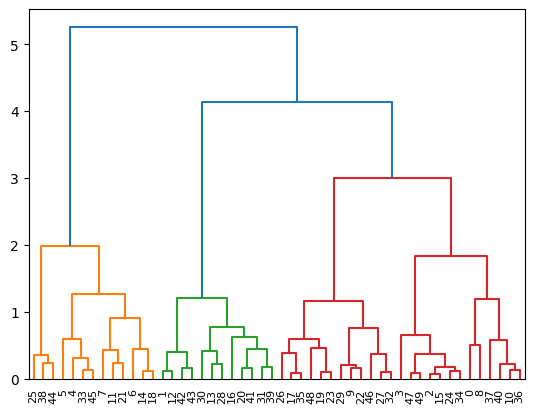

In [164]:
dendro2 = hierarchy.dendrogram(z)

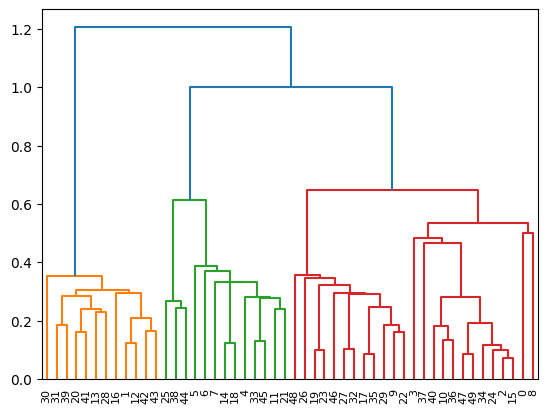

In [165]:
dendro3 = hierarchy.dendrogram(x)

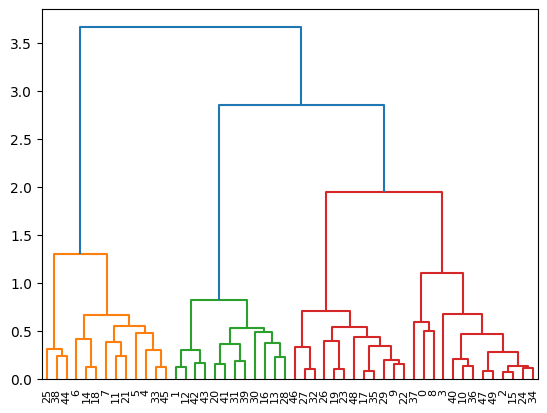

In [166]:
dendro3 = hierarchy.dendrogram(y)

**Soal 2**

Lakukan agglomerative clustering scipy dan scikit-leat dengan single linkage dan avergae linkage untuk dataset cars-clustering! Jelaskan perbedannya!

Jawab: Scipy Single Linkage, pohon dendrogram yang lebih panjang dan banyak cabang terpisah. Cluster akan terhubung lebih cepat, namun bisa menghasilkan cluster yang lebih besar dan tidak kompak. Dengan Average Linkage, dendrogram cenderung lebih terstruktur dan kompak, karena penggabungan cluster berdasarkan rata-rata jarak antar titik, yang lebih menjaga kestabilan pengelompokan.

Scikit-learn Single Linkage cenderung menghasilkan label yang lebih terpisah, karena penggabungan lebih cepat berdasarkan jarak minimum.
Average Linkage menghasilkan label cluster yang lebih seimbang, lebih homogen dan sering kali lebih kompak.

Membaca data

In [167]:
pdf = pd.read_csv('cars_clus.csv')
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


Data cleaning

In [168]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


Feature Selection

In [169]:
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap','mpg']]

Normalization

In [170]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

Clustering dengan Scipy

In [171]:
import scipy
leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

Single Linkage

In [172]:
import pylab
import scipy.cluster.hierarchy

# single linkage
x = hierarchy.linkage(D, 'single')

<ipython-input-172-317120b98651>:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  x = hierarchy.linkage(D, 'single')


In [173]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(x, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [174]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(x, k, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

Plotting dendogram

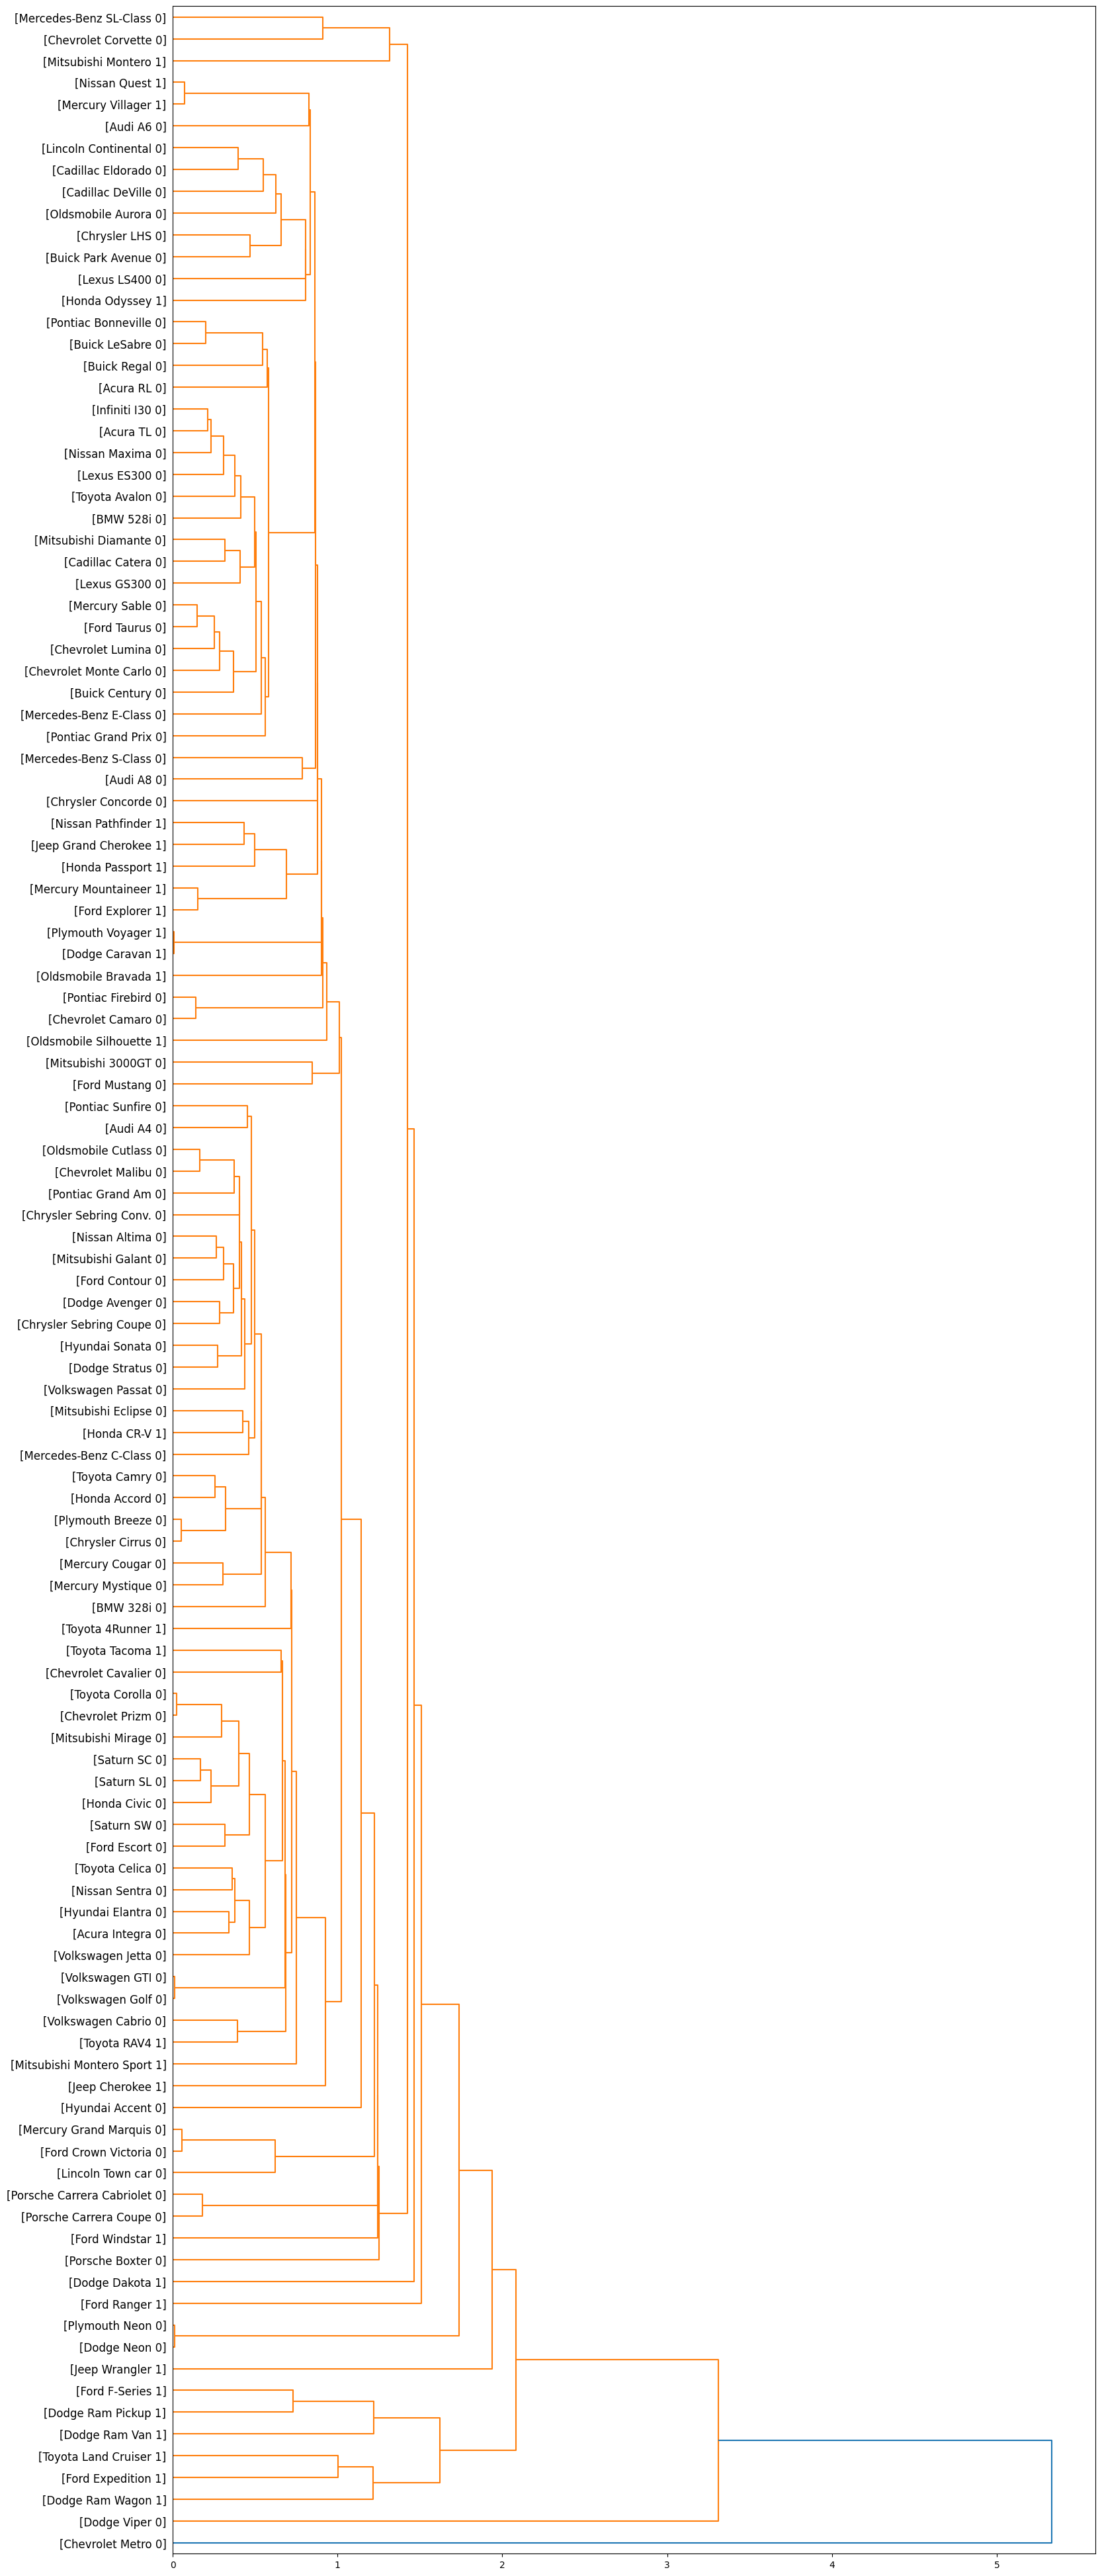

In [175]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )

dendro = hierarchy.dendrogram(x,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Average linkage

In [176]:
# average linkage
z = hierarchy.linkage(D, 'average')

<ipython-input-176-83ac34961162>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(D, 'average')


In [177]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(z, max_d, criterion='distance')
clusters

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

In [178]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(x, k, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

Plotting dendogram

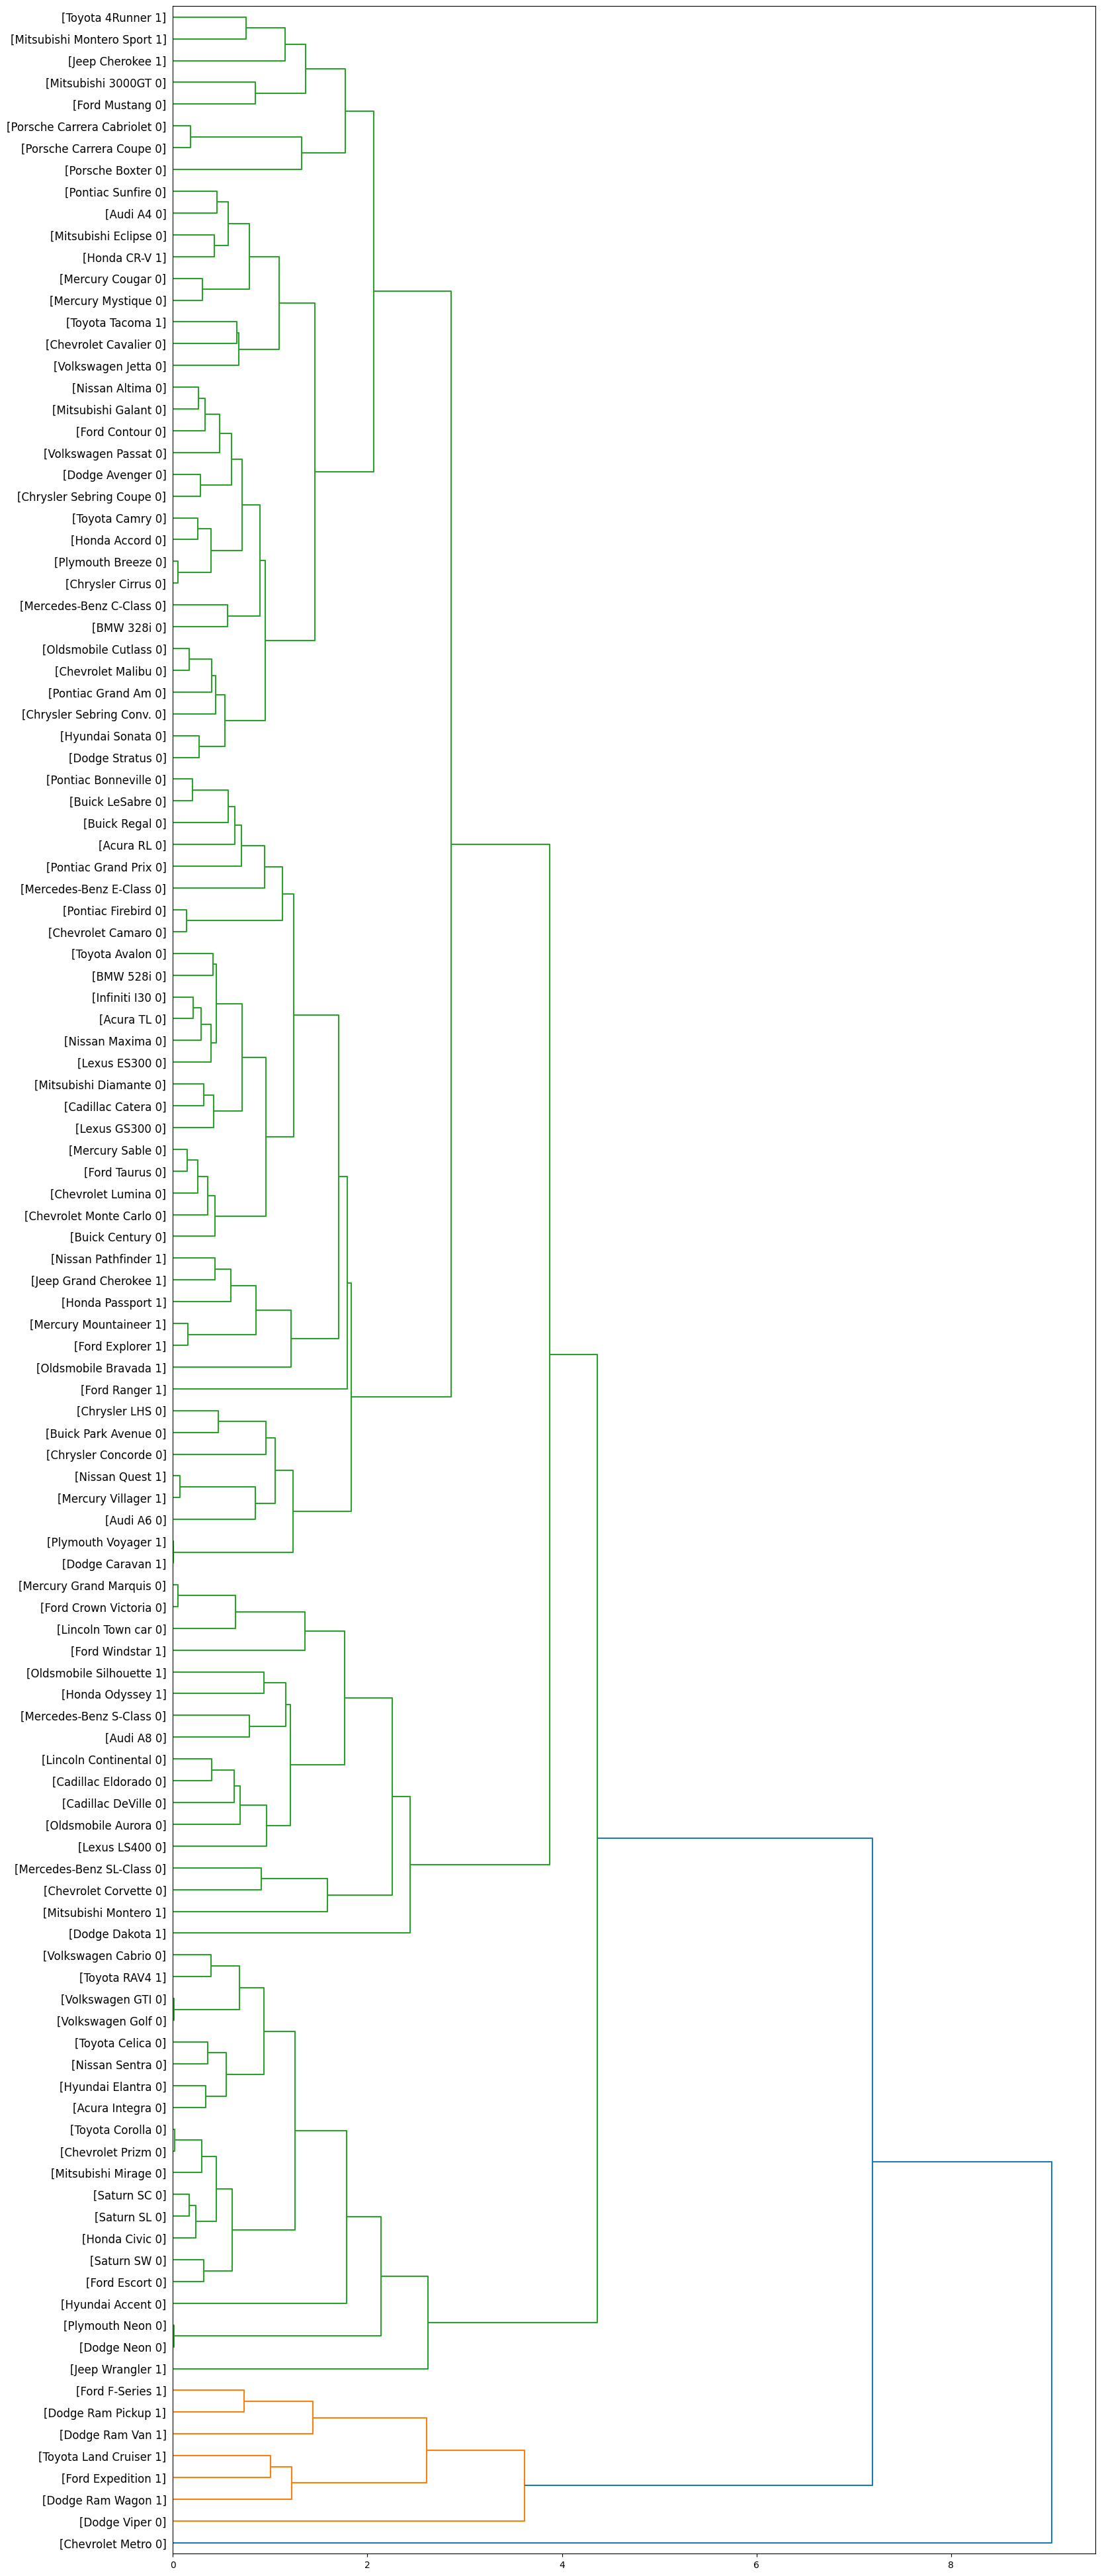

In [179]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )

dendro = hierarchy.dendrogram(z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Clustering with Scikit-Learn

In [180]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


Single linkage

In [181]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'single')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [182]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,0


Clustering dengan scikit-learn

<ipython-input-183-e1b73c1ea230>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

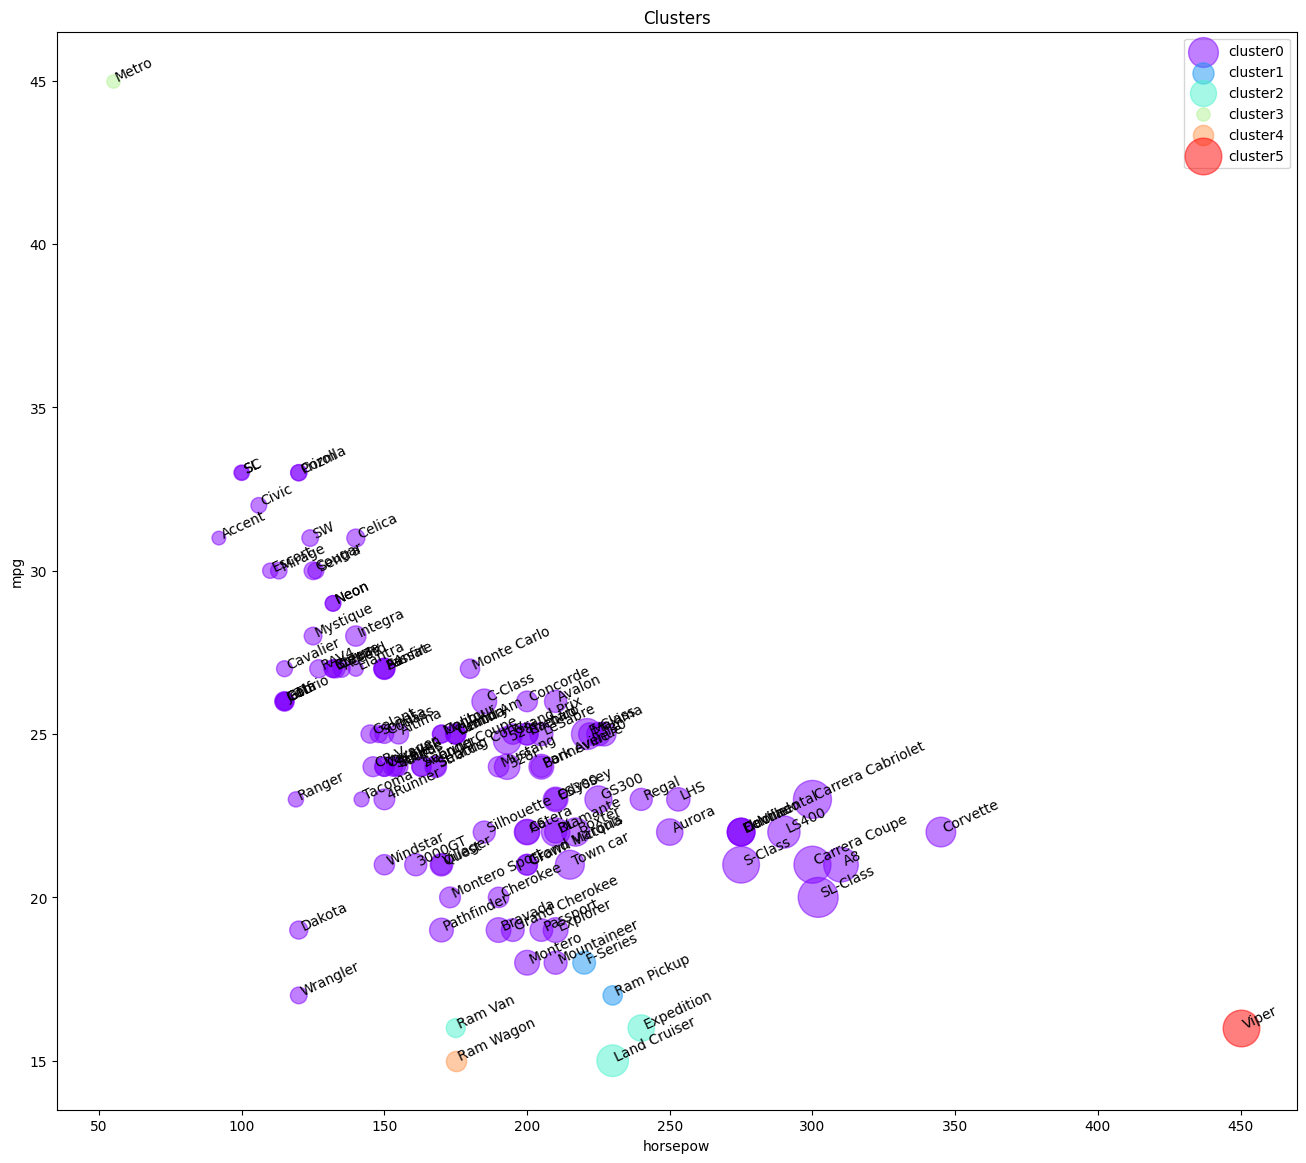

In [183]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [184]:
pdf.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     86
          1.0     23
1         1.0      2
2         1.0      3
3         0.0      1
4         1.0      1
5         0.0      1
Name: cluster_, dtype: int64

In [185]:
agg_cars = pdf.groupby(['cluster_','type'])[['horsepow','engine_s','mpg','price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   181.197674  2.902326  25.358140  26.286779
         1.0   167.478261  3.095652  21.000000  22.811261
1        1.0   225.000000  4.900000  17.500000  23.197500
2        1.0   215.000000  4.400000  15.666667  35.479333
3        0.0    55.000000  1.000000  45.000000   9.235000
4        1.0   175.000000  3.900000  15.000000  21.315000
5        0.0   450.000000  8.000000  16.000000  69.725000

Plottiing dendogram

<ipython-input-186-7f34f10a4fc5>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
<ipython-input-186-7f34f10a4fc5>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

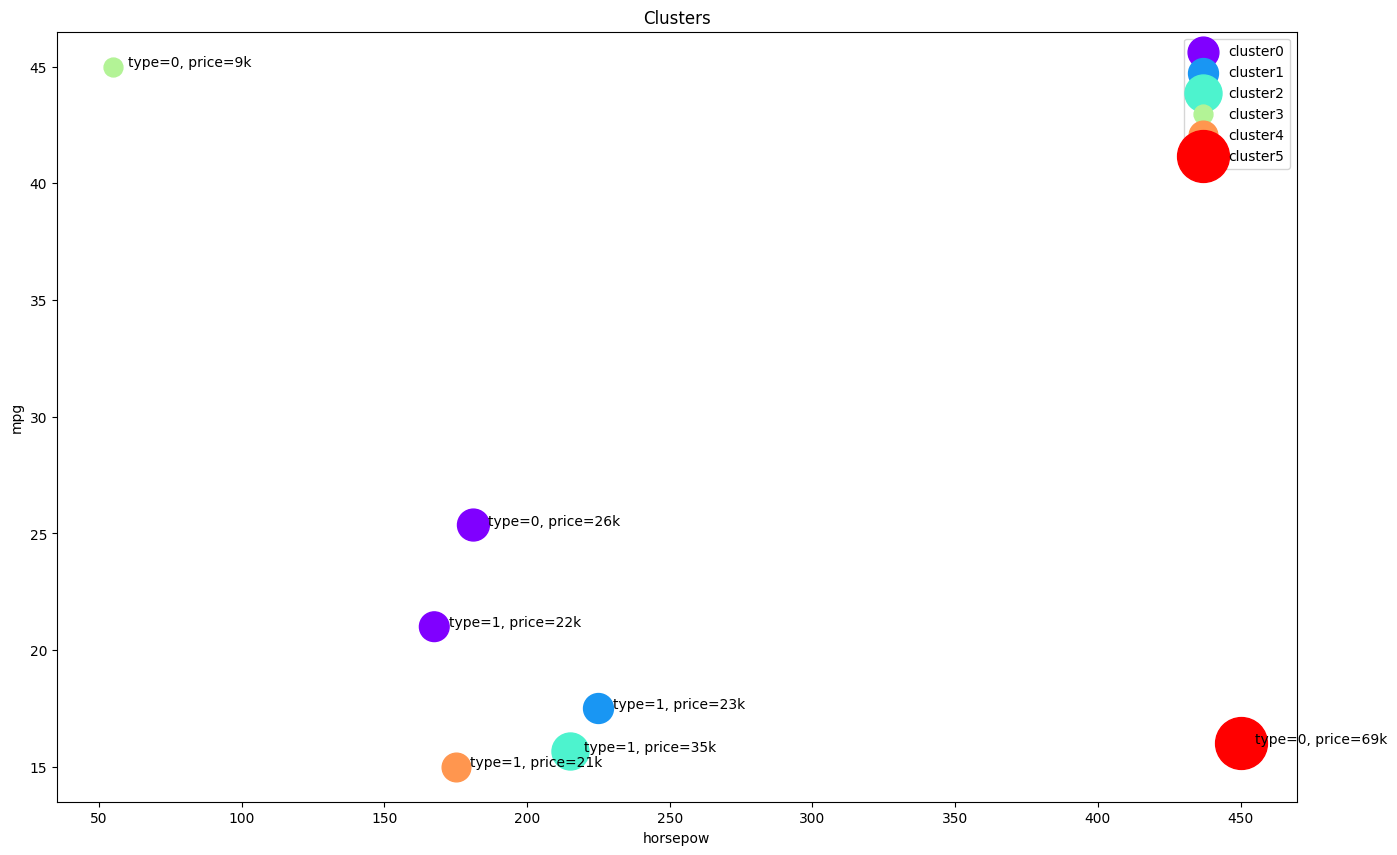

In [186]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Average linkage

In [187]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'average')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1, 0,
       3, 0, 0, 4, 0, 4, 0, 0, 0, 1, 5, 2, 2, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       2, 4, 5, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [188]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,4


Clustering dengan scikit-learn

<ipython-input-189-e1b73c1ea230>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

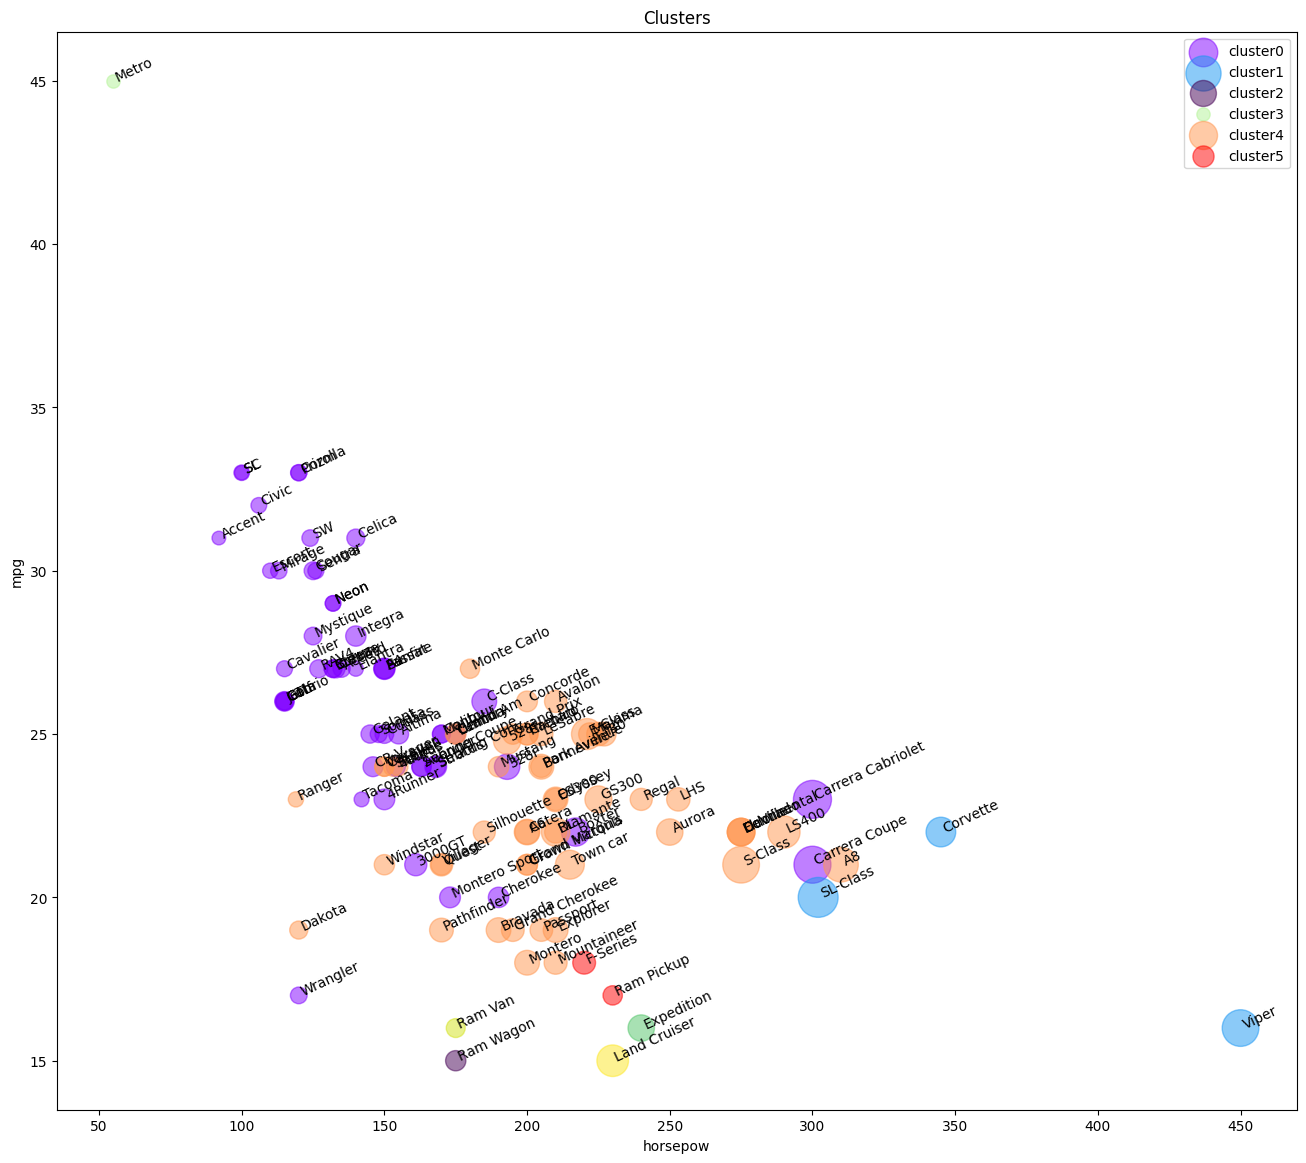

In [189]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [190]:
pdf.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

In [191]:
agg_cars = pdf.groupby(['cluster_','type'])[['horsepow','engine_s','mpg','price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

Plotting dendogram

<ipython-input-192-7f34f10a4fc5>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
<ipython-input-192-7f34f10a4fc5>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

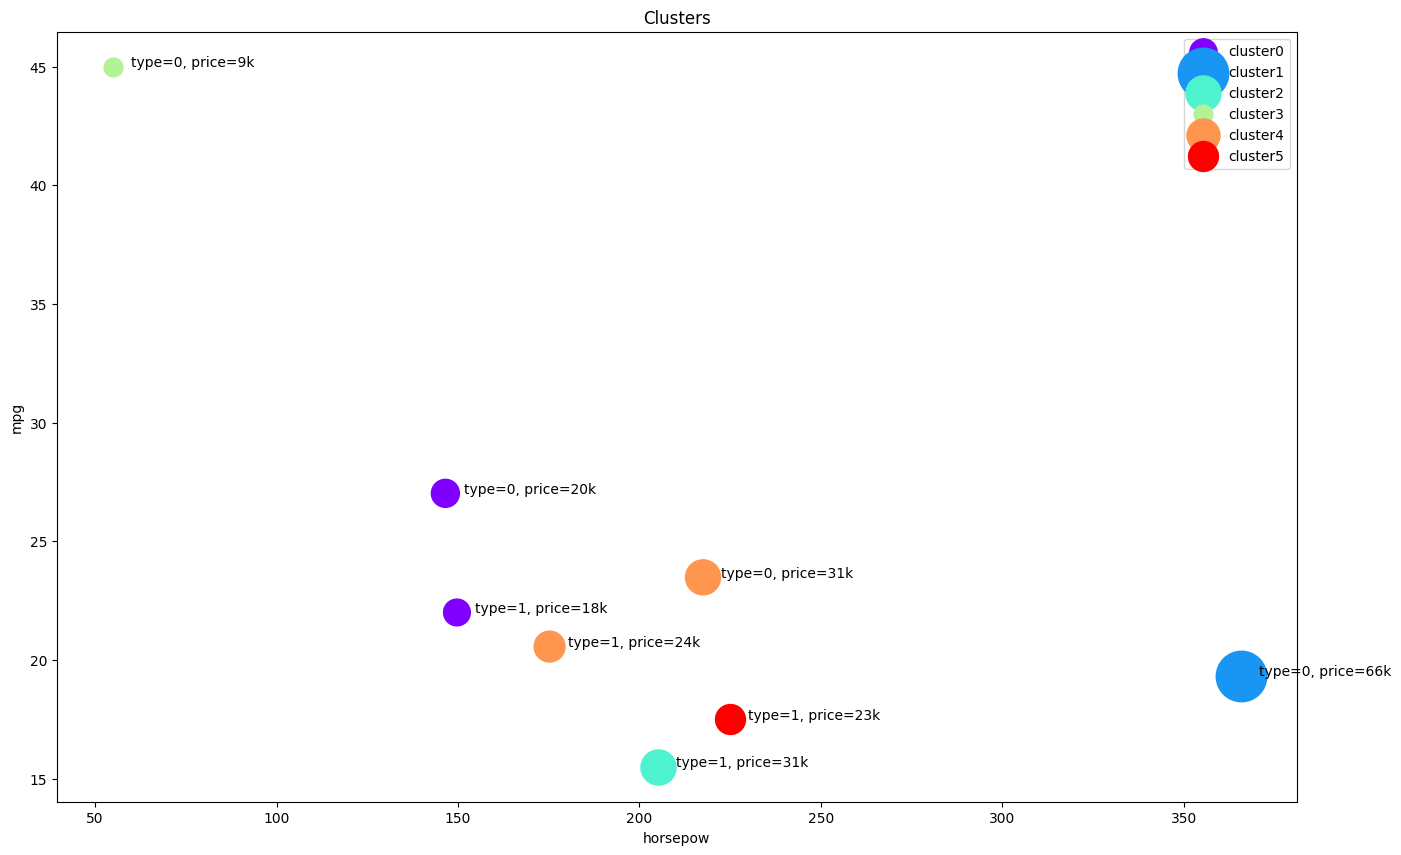

In [192]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

**Soal 3**

Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage, average linkage, dan complete linkage untuk dataset iris. Jelaskan perbedaannya!

Jawab: Single Linkage, jarak antara dua cluster dihitung berdasarkan jarak terdekat antara anggota cluster. Metode ini sering kali menghasilkan cluster yang lebih panjang dan terhubung, karena meskipun dua cluster mungkin sangat jauh, jika ada satu titik yang sangat dekat, kedua cluster tersebut akan digabungkan. Hal ini dapat menyebabkan efek "chaining", di mana dua cluster yang tidak homogen tetap bergabung, sehingga menghasilkan struktur dendrogram yang lebih memanjang.

Average Linkage, jarak antara dua cluster dihitung sebagai rata-rata jarak antar semua pasangan titik data yang ada di dua cluster tersebut. Metode ini cenderung menghasilkan cluster yang lebih kompak dan terorganisir karena tidak terlalu dipengaruhi oleh titik yang sangat dekat atau sangat jauh. Dendrogram yang dihasilkan lebih simetris, dengan penggabungan yang lebih terstruktur dan seimbang.

Complete Linkage, penggabungan dua cluster dilakukan berdasarkan jarak terjauh antara dua titik data di cluster yang berbeda. Metode ini menghasilkan cluster yang sangat kompak dan terpisah karena hanya cluster yang memiliki jarak terjauh minimum yang digabungkan. Oleh karena itu, setiap penggabungan cluster cenderung lebih konservatif, dan dendrogram yang dihasilkan biasanya lebih terpisah, menciptakan struktur yang lebih jelas dan terdefinisi.

Membuat dataset

In [193]:
from sklearn.datasets import load_iris
iris = load_iris()

Data cleaning

In [194]:
pdf = pd.DataFrame(data=iris.data, columns=iris.feature_names)
pdf['target'] = iris.target  # Tambahkan target sebagai kolom
print("Shape of dataset before cleaning: ", pdf.size)
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print("Shape of dataset after cleaning: ", pdf.size)

# Menampilkan 5 data pertama
print(pdf.head(5))

Shape of dataset before cleaning:  750
Shape of dataset after cleaning:  750
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


Normalization

In [195]:
from sklearn.preprocessing import MinMaxScaler
x = pdf.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ]])

Clustering dengan Scipy

In [196]:
import scipy
leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [197]:
import pylab
import scipy.cluster.hierarchy
s = hierarchy.linkage(D, 'single')
a = hierarchy.linkage(D, 'average')
c = hierarchy.linkage(D, 'complete')

<ipython-input-197-861fa0659c7a>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  s = hierarchy.linkage(D, 'single')
<ipython-input-197-861fa0659c7a>:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  a = hierarchy.linkage(D, 'average')
<ipython-input-197-861fa0659c7a>:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  c = hierarchy.linkage(D, 'complete')


In [198]:
from scipy.cluster.hierarchy import fcluster
max_d = 3

# Membuat cluster dengan fcluster untuk masing-masing metode
clusters_single = fcluster(s, max_d, criterion='distance')
clusters_average = fcluster(a, max_d, criterion='distance')
clusters_complete = fcluster(c, max_d, criterion='distance')

# Menampilkan hasil clustering
print("Clusters (Single Linkage):", clusters_single)
print("Clusters (Average Linkage):", clusters_average)
print("Clusters (Complete Linkage):", clusters_complete)

Clusters (Single Linkage): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]
Clusters (Average Linkage): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 3 4 4 4 3 4
 4 4 4 4 4 4 3 3 4 4 4 3 4 4 4 4 4 4 4 4 3 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4
 4 4]
Clusters (Complete Linkage): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 4 4 4 5 4 5 4 3 4 5 3 5 5 5 5 4 5 5 4 5 4 5 4 5
 5 4 4 4 5 5 5 5 5 4 5 4 4 4 5 5 5 5 5 3 5 5 5 5 3 5 8 9 8 9 8 6 7 8 9 6 9
 9 8 9 9 8 9 6 6 7 8 9 6 9 8 8 9 9 9 8 8 6 9 9 7 6 8 9 9 8 8 8 9 8 8 8 9 9
 8 9

In [199]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters_single = fcluster(s, k, criterion='maxclust')
clusters_complete = fcluster(c, k, criterion='maxclust')
clusters_average = fcluster(a, k, criterion='maxclust')

# Menampilkan hasil clustering
print("Clusters (Single Linkage):", clusters_single)
print("Clusters (Average Linkage):", clusters_average)
print("Clusters (Complete Linkage):", clusters_complete)

Clusters (Single Linkage): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 5 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4]
Clusters (Average Linkage): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 3 5 4 4 3 4
 4 4 4 4 4 4 3 3 4 4 4 3 4 4 4 4 4 4 4 4 3 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4
 4 4]
Clusters (Complete Linkage): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 2 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 5 5 5 5 5 4 5 5 5 4 5
 5 5 5 5 5 5 4 4 5 5 5 4 5 5 5 5 5 5 5 5 4 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5
 5 5

In [200]:
print(pdf.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


Plotting dendogram

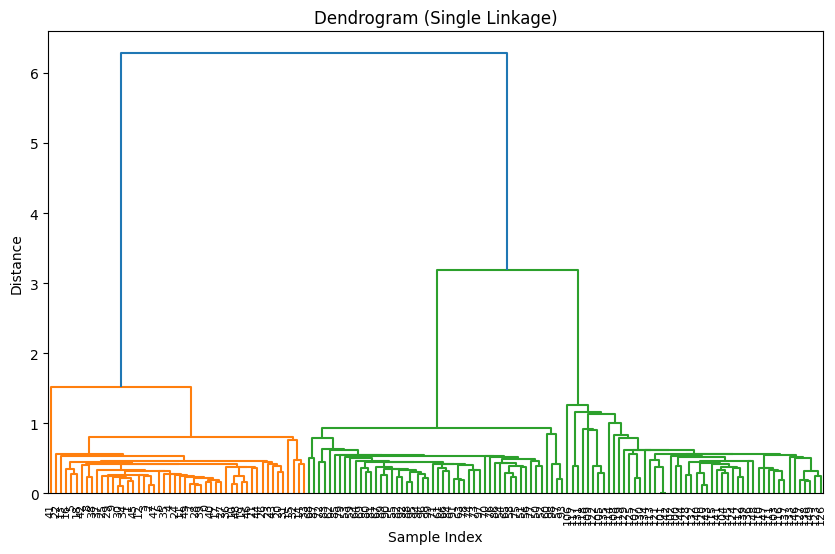

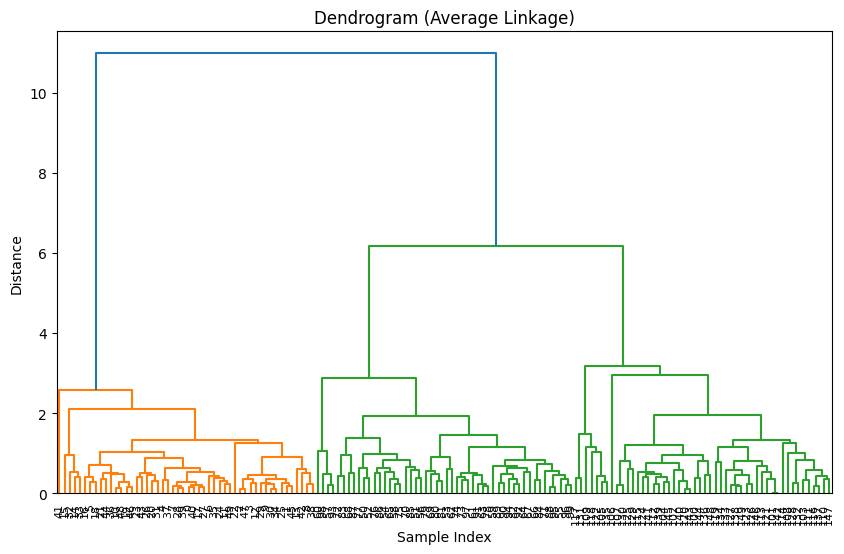

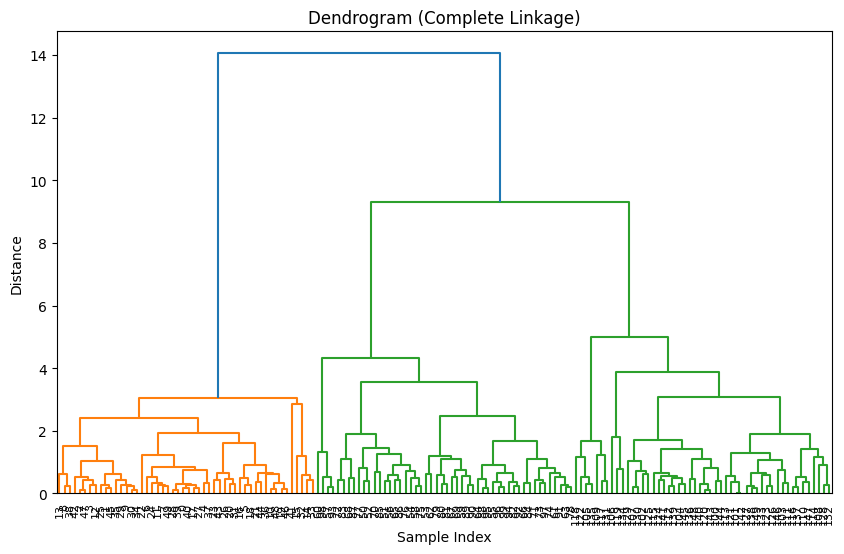

In [201]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Fungsi untuk menampilkan dendrogram
def plot_dendrogram(linkage_matrix, title):
    plt.figure(figsize=(10, 6))  # Mengatur ukuran gambar
    dendro = hierarchy.dendrogram(
        linkage_matrix,
        leaf_rotation=90,  # Rotasi label agar horizontal
        leaf_font_size=8,  # Ukuran font label lebih kecil
    )
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()

# Menampilkan dendrogram untuk masing-masing metode
plot_dendrogram(s, "Dendrogram (Single Linkage)")
plot_dendrogram(a, "Dendrogram (Average Linkage)")
plot_dendrogram(c, "Dendrogram (Complete Linkage)")

Clustering with Scikit-Learn

In [202]:
# Menghitung matriks jarak
dist_matrix = distance_matrix(feature_mtx, feature_mtx)
print("Distance Matrix:")
print(dist_matrix)

Distance Matrix:
[[0.         0.21561354 0.16810102 ... 1.47375733 1.52327389 1.38942712]
 [0.21561354 0.         0.10157824 ... 1.47473869 1.54384003 1.38379288]
 [0.16810102 0.10157824 0.         ... 1.50212777 1.5585531  1.40617329]
 ...
 [1.47375733 1.47473869 1.50212777 ... 0.         0.226928   0.18710825]
 [1.52327389 1.54384003 1.5585531  ... 0.226928   0.         0.28409587]
 [1.38942712 1.38379288 1.40617329 ... 0.18710825 0.28409587 0.        ]]


Single linkage

In [203]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'single')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [204]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


Clustering dengan scikit-learn

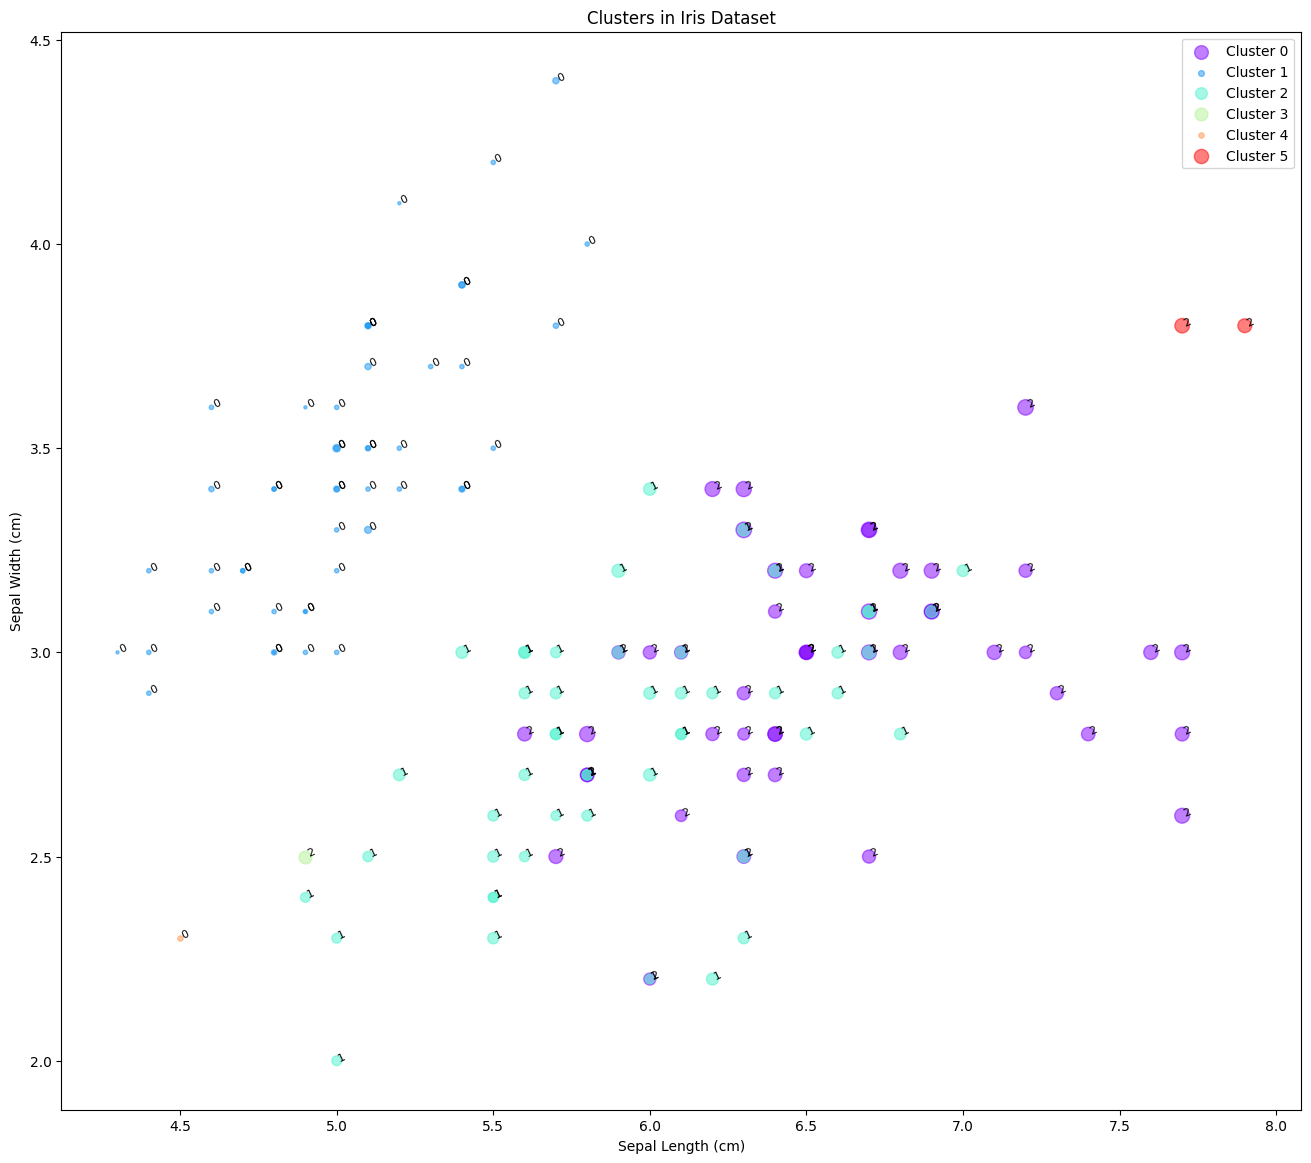

In [205]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Membuat plot
plt.figure(figsize=(16, 14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        plt.text(
            subset['sepal length (cm)'][i],
            subset['sepal width (cm)'][i],
            str(subset['target'][i]),  # Label data asli
            rotation=25,
            fontsize=8
        )
    plt.scatter(
        subset['sepal length (cm)'],
        subset['sepal width (cm)'],
        s=subset['petal width (cm)'] * 50,  # Ukuran berdasarkan petal width
        c=[color],
        label='Cluster ' + str(label),
        alpha=0.5
    )

plt.legend()
plt.title('Clusters in Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

In [206]:
pdf['type'] = pdf['target']  # Salin target ke kolom type
pdf.groupby(['cluster_','type'])['cluster_'].count()

,,cluster_
cluster_,type,
0,2,47
1,0,49
2,1,50
3,2,1
4,0,1
5,2,2


In [207]:
# Mengelompokkan data berdasarkan cluster dan type, lalu menghitung rata-rata setiap fitur
agg_iris = pdf.groupby(['cluster_', 'type'])[['sepal length (cm)', 'sepal width (cm)',
                                              'petal length (cm)', 'petal width (cm)']].mean()

# Menampilkan hasil
print(agg_iris)

               sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster_ type                                                           
0        2              6.572340          2.948936           5.531915   
1        0              5.016327          3.451020           1.465306   
2        1              5.936000          2.770000           4.260000   
3        2              4.900000          2.500000           4.500000   
4        0              4.500000          2.300000           1.300000   
5        2              7.800000          3.800000           6.550000   

               petal width (cm)  
cluster_ type                    
0        2             2.029787  
1        0             0.244898  
2        1             1.326000  
3        2             1.700000  
4        0             0.300000  
5        2             2.100000  


Plotting dendogram

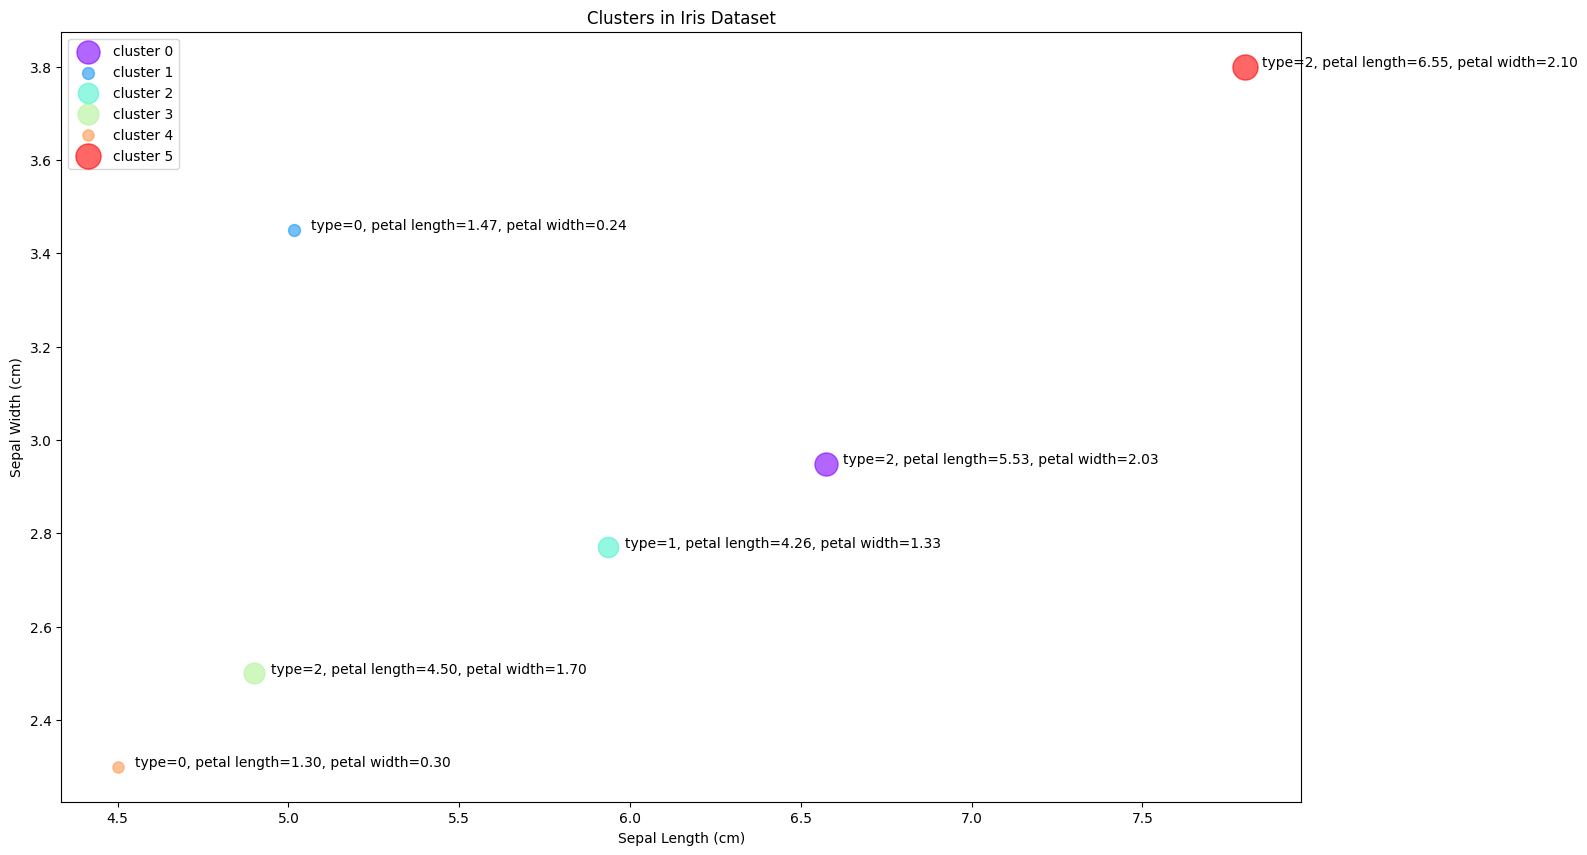

In [208]:
plt.figure(figsize=(16, 10))

# Plot berdasarkan cluster dan label
for color, label in zip(colors, cluster_labels):
    subset = agg_iris.loc[(label,),]  # Mengambil subset data untuk cluster tertentu
    for i in subset.index:
        plt.text(
            subset.loc[i]['sepal length (cm)'] + 0.05,
            subset.loc[i]['sepal width (cm)'],
            f'type={int(i)}, petal length={subset.loc[i]["petal length (cm)"]:.2f}, petal width={subset.loc[i]["petal width (cm)"]:.2f}'
        )
    plt.scatter(
        subset['sepal length (cm)'],
        subset['sepal width (cm)'],
        s=subset['petal length (cm)'] * 50,  # Ukuran berdasarkan panjang petal
        c=[color],
        label=f'cluster {label}',
        alpha=0.6
    )

plt.legend()
plt.title('Clusters in Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

Complete linkage

In [209]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([4, 3, 3, 3, 4, 4, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 4,
       4, 3, 4, 3, 4, 4, 5, 5, 5, 2, 5, 2, 5, 2, 5, 2, 2, 5, 2, 5, 2, 5,
       2, 2, 2, 2, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 5, 5, 2,
       2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [210]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_,type
0,5.1,3.5,1.4,0.2,0,4,0
1,4.9,3.0,1.4,0.2,0,3,0
2,4.7,3.2,1.3,0.2,0,3,0
3,4.6,3.1,1.5,0.2,0,3,0
4,5.0,3.6,1.4,0.2,0,4,0


Clustering dengan scikit-learn

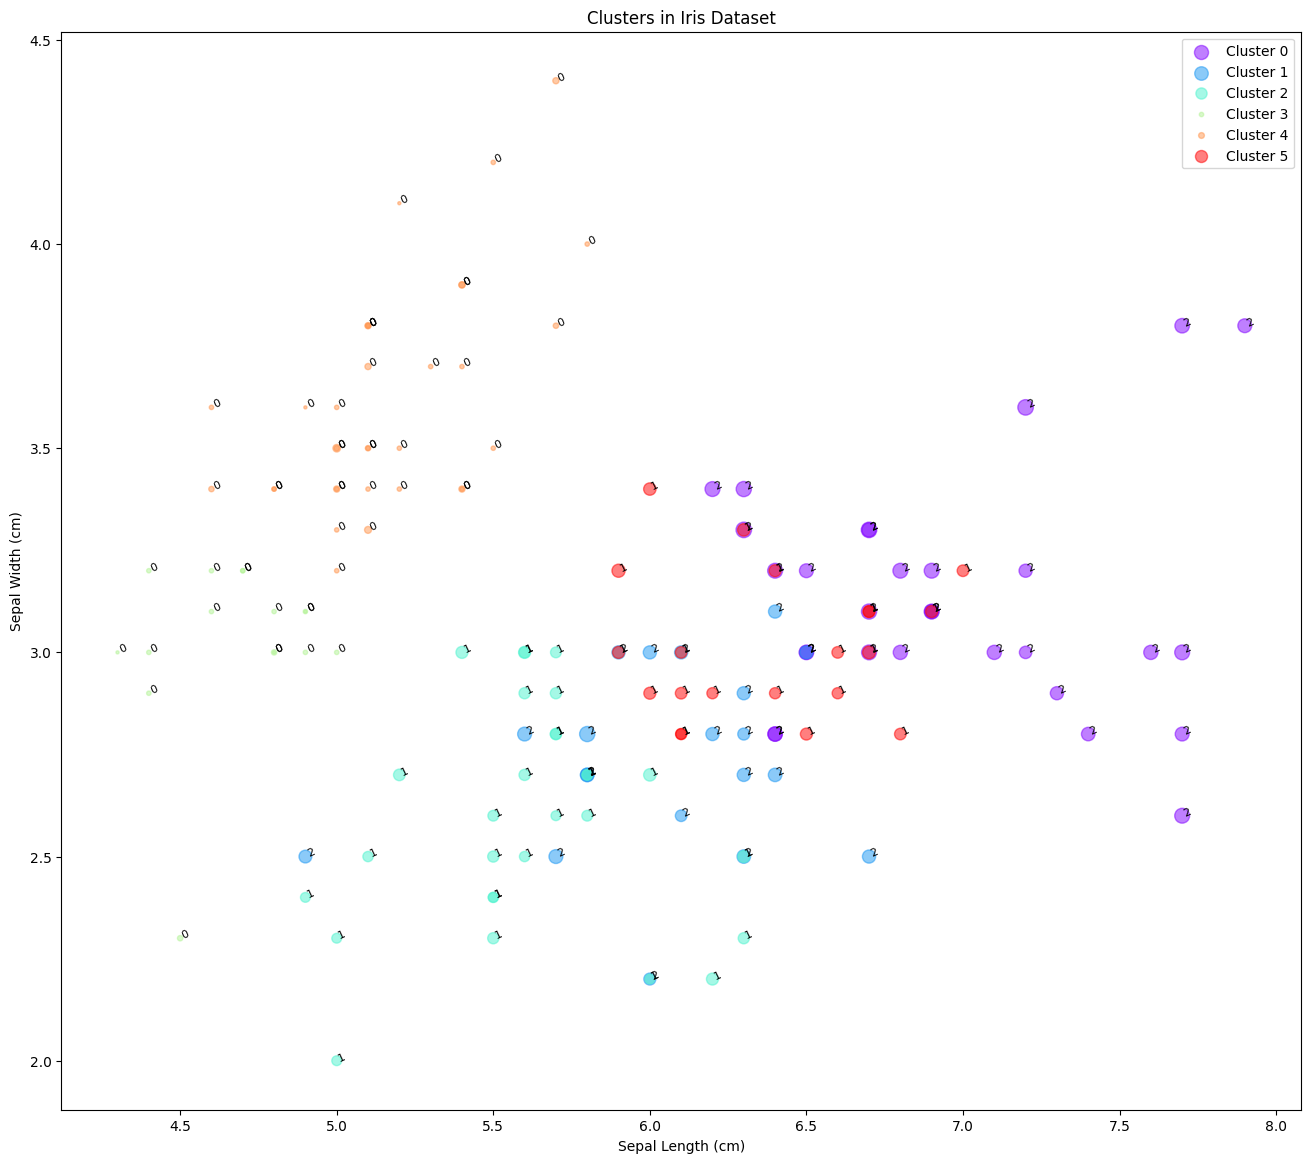

In [211]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Membuat plot
plt.figure(figsize=(16, 14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        plt.text(
            subset['sepal length (cm)'][i],
            subset['sepal width (cm)'][i],
            str(subset['target'][i]),  # Label data asli
            rotation=25,
            fontsize=8
        )
    plt.scatter(
        subset['sepal length (cm)'],
        subset['sepal width (cm)'],
        s=subset['petal width (cm)'] * 50,  # Ukuran berdasarkan petal width
        c=[color],
        label='Cluster ' + str(label),
        alpha=0.5
    )

plt.legend()
plt.title('Clusters in Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

In [212]:
pdf['type'] = pdf['target']  # Salin target ke kolom type
pdf.groupby(['cluster_','type'])['cluster_'].count()

,,cluster_
cluster_,type,
0,2,30
1,2,20
2,1,29
3,0,16
4,0,34
5,1,21


In [213]:
# Mengelompokkan data berdasarkan cluster dan type, lalu menghitung rata-rata setiap fitur
agg_iris = pdf.groupby(['cluster_', 'type'])[['sepal length (cm)', 'sepal width (cm)',
                                              'petal length (cm)', 'petal width (cm)']].mean()

# Menampilkan hasil
print(agg_iris)

               sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster_ type                                                           
0        2              6.943333          3.130000           5.833333   
1        2              6.055000          2.740000           5.130000   
2        1              5.613793          2.593103           4.037931   
3        0              4.668750          3.025000           1.412500   
4        0              5.164706          3.617647           1.485294   
5        1              6.380952          3.014286           4.566667   

               petal width (cm)  
cluster_ type                    
0        2             2.166667  
1        2             1.815000  
2        1             1.234483  
3        0             0.193750  
4        0             0.270588  
5        1             1.452381  


Plotting dendogram

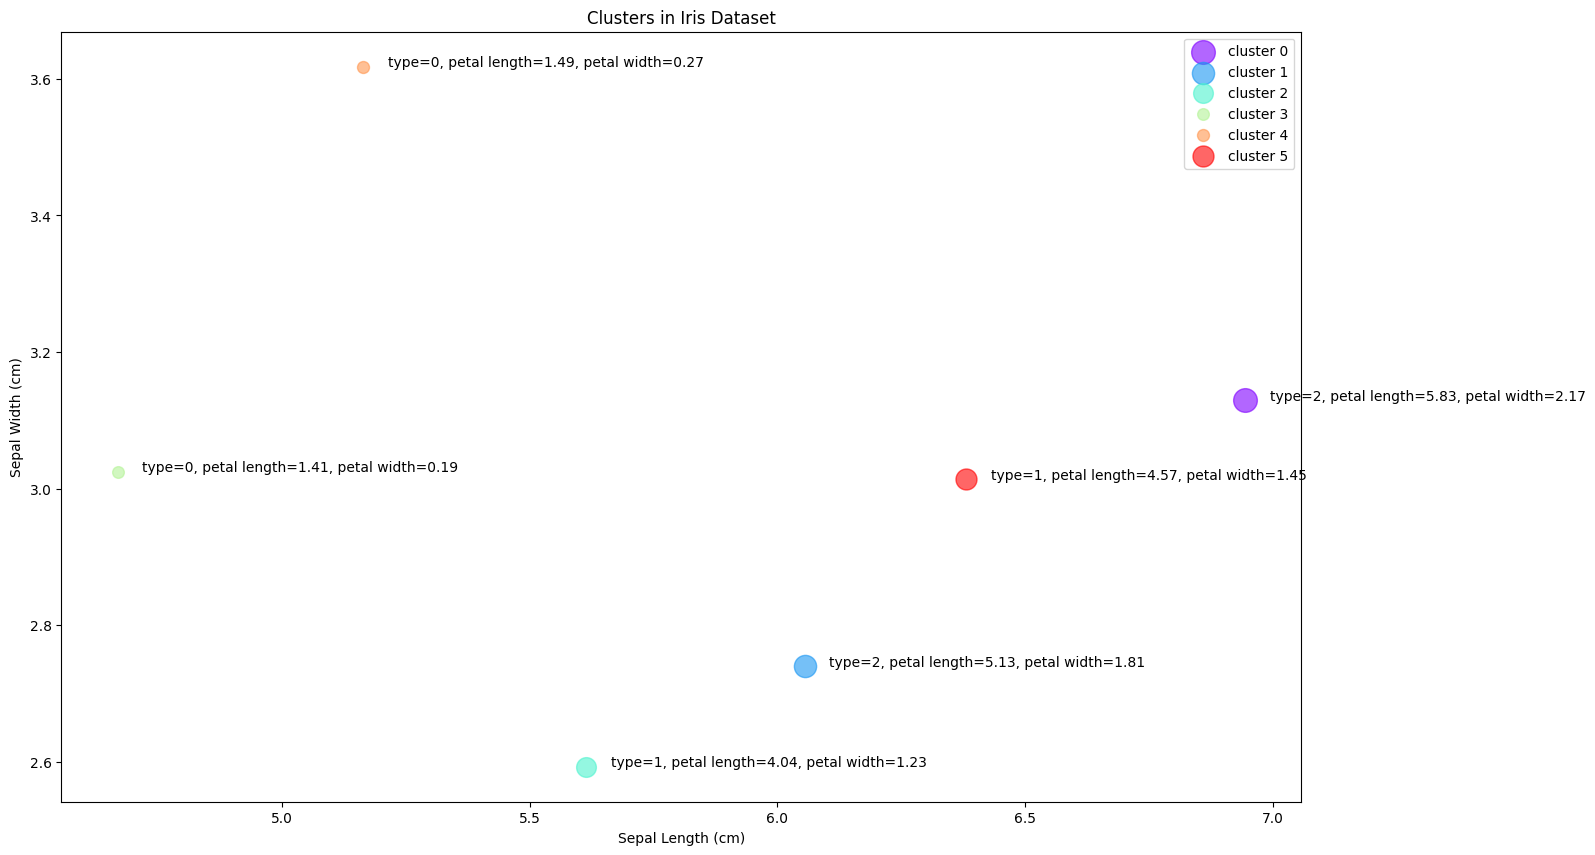

In [214]:
plt.figure(figsize=(16, 10))

# Plot berdasarkan cluster dan label
for color, label in zip(colors, cluster_labels):
    subset = agg_iris.loc[(label,),]  # Mengambil subset data untuk cluster tertentu
    for i in subset.index:
        plt.text(
            subset.loc[i]['sepal length (cm)'] + 0.05,
            subset.loc[i]['sepal width (cm)'],
            f'type={int(i)}, petal length={subset.loc[i]["petal length (cm)"]:.2f}, petal width={subset.loc[i]["petal width (cm)"]:.2f}'
        )
    plt.scatter(
        subset['sepal length (cm)'],
        subset['sepal width (cm)'],
        s=subset['petal length (cm)'] * 50,  # Ukuran berdasarkan panjang petal
        c=[color],
        label=f'cluster {label}',
        alpha=0.6
    )

plt.legend()
plt.title('Clusters in Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

Average linkage

In [215]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'average')
agglom.fit(feature_mtx)
agglom.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [216]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_,type
0,5.1,3.5,1.4,0.2,0,2,0
1,4.9,3.0,1.4,0.2,0,2,0
2,4.7,3.2,1.3,0.2,0,2,0
3,4.6,3.1,1.5,0.2,0,2,0
4,5.0,3.6,1.4,0.2,0,2,0


Clustering dengan scikit-learn

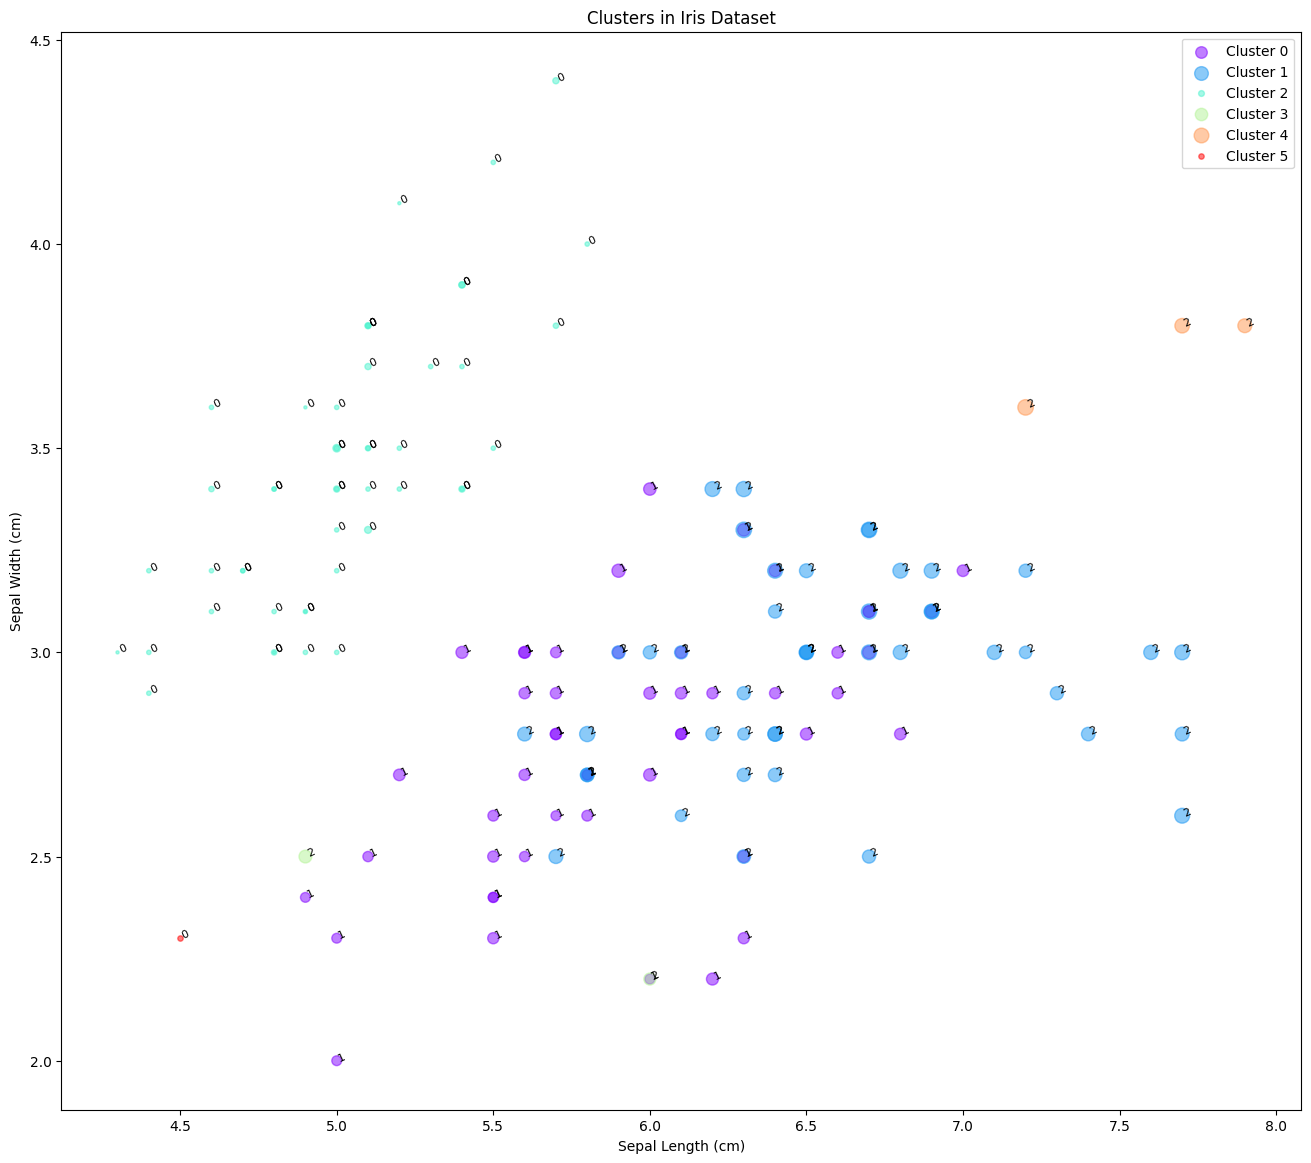

In [217]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Membuat plot
plt.figure(figsize=(16, 14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        plt.text(
            subset['sepal length (cm)'][i],
            subset['sepal width (cm)'][i],
            str(subset['target'][i]),  # Label data asli
            rotation=25,
            fontsize=8
        )
    plt.scatter(
        subset['sepal length (cm)'],
        subset['sepal width (cm)'],
        s=subset['petal width (cm)'] * 50,  # Ukuran berdasarkan petal width
        c=[color],
        label='Cluster ' + str(label),
        alpha=0.5
    )

plt.legend()
plt.title('Clusters in Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

In [218]:
pdf['type'] = pdf['target']  # Salin target ke kolom type
pdf.groupby(['cluster_','type'])['cluster_'].count()

,,cluster_
cluster_,type,
0,1,50
1,2,45
2,0,49
3,2,2
4,2,3
5,0,1


In [219]:
# Mengelompokkan data berdasarkan cluster dan type, lalu menghitung rata-rata setiap fitur
agg_iris = pdf.groupby(['cluster_', 'type'])[['sepal length (cm)', 'sepal width (cm)',
                                              'petal length (cm)', 'petal width (cm)']].mean()

# Menampilkan hasil
print(agg_iris)

               sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster_ type                                                           
0        1              5.936000          2.770000           4.260000   
1        2              6.571111          2.951111           5.531111   
2        0              5.016327          3.451020           1.465306   
3        2              5.450000          2.350000           4.750000   
4        2              7.600000          3.733333           6.400000   
5        0              4.500000          2.300000           1.300000   

               petal width (cm)  
cluster_ type                    
0        1             1.326000  
1        2             2.031111  
2        0             0.244898  
3        2             1.600000  
4        2             2.233333  
5        0             0.300000  


Plotting dendogram

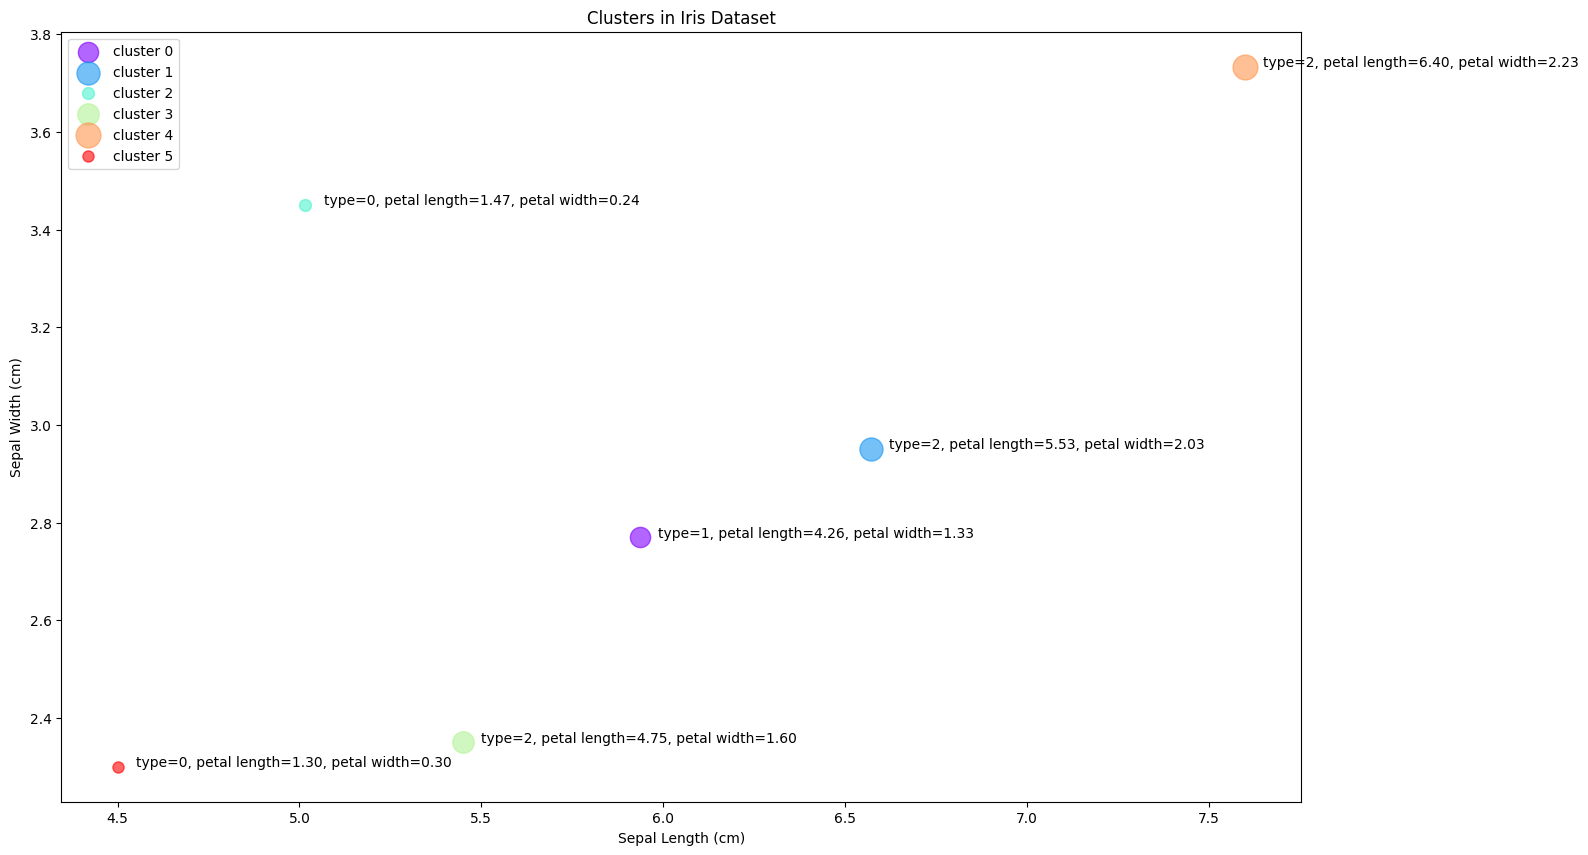

In [220]:
plt.figure(figsize=(16, 10))

# Plot berdasarkan cluster dan label
for color, label in zip(colors, cluster_labels):
    subset = agg_iris.loc[(label,),]  # Mengambil subset data untuk cluster tertentu
    for i in subset.index:
        plt.text(
            subset.loc[i]['sepal length (cm)'] + 0.05,
            subset.loc[i]['sepal width (cm)'],
            f'type={int(i)}, petal length={subset.loc[i]["petal length (cm)"]:.2f}, petal width={subset.loc[i]["petal width (cm)"]:.2f}'
        )
    plt.scatter(
        subset['sepal length (cm)'],
        subset['sepal width (cm)'],
        s=subset['petal length (cm)'] * 50,  # Ukuran berdasarkan panjang petal
        c=[color],
        label=f'cluster {label}',
        alpha=0.6
    )

plt.legend()
plt.title('Clusters in Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()